https://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html

Mean Squared Error (MSE): 0.07945321617906367
Coefficient of Determination (R^2): 0.8128006304266792
Mean Squared Error (MSE): 0.07945321617906367
Coefficient of Determination (R^2): 0.8128006304266792


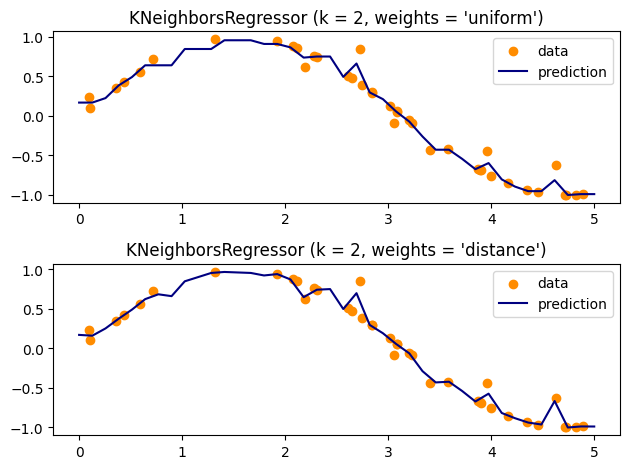

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 40)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.50 - np.random.rand(8))

n_neighbors = 2

for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))
    # Calcula las predicciones del modelo
    # y_pred = knn.predict(X)
    y_T = np.sin(T).ravel()
    

    # Calcula el MSE
    mse = mean_squared_error(y, y_pred)
    print("Mean Squared Error (MSE):", mse)

    # Calcula el coeficiente de determinación R^2
    r2 = r2_score(y, y_pred)
    print("Coefficient of Determination (R^2):", r2)


plt.tight_layout()
plt.show()

Valor predicho para el nuevo dato: 0.4076839402261829


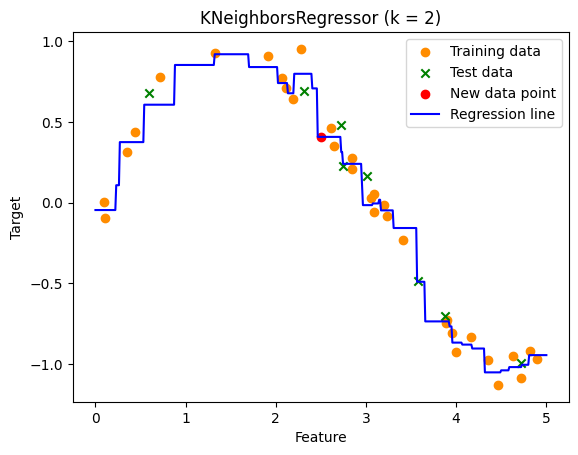

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Datos de ejemplo
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, size=X.shape[0])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
n_neighbors = 2
knn = KNeighborsRegressor(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)

# Agregar un nuevo dato manualmente
new_data_point = np.array([[2.5]])  # Ejemplo de nuevo dato
predicted_value = knn.predict(new_data_point)
print("Valor predicho para el nuevo dato:", predicted_value[0])

# Obtener las predicciones para los datos de entrenamiento y prueba
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Calcular la línea de regresión
x_values = np.linspace(0, 5, 500).reshape(-1, 1)
y_values = knn.predict(x_values)

# Graficar los datos de entrenamiento y prueba, la línea de regresión y el nuevo dato
plt.scatter(X_train, y_train, color="darkorange", label="Training data")
plt.scatter(X_test, y_test, color="green", label="Test data", marker='x')
plt.scatter(new_data_point, predicted_value, color="red", label="New data point")
plt.plot(x_values, y_values, color='blue', label='Regression line')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("KNeighborsRegressor (k = %i)" % n_neighbors)
plt.legend()
plt.show()

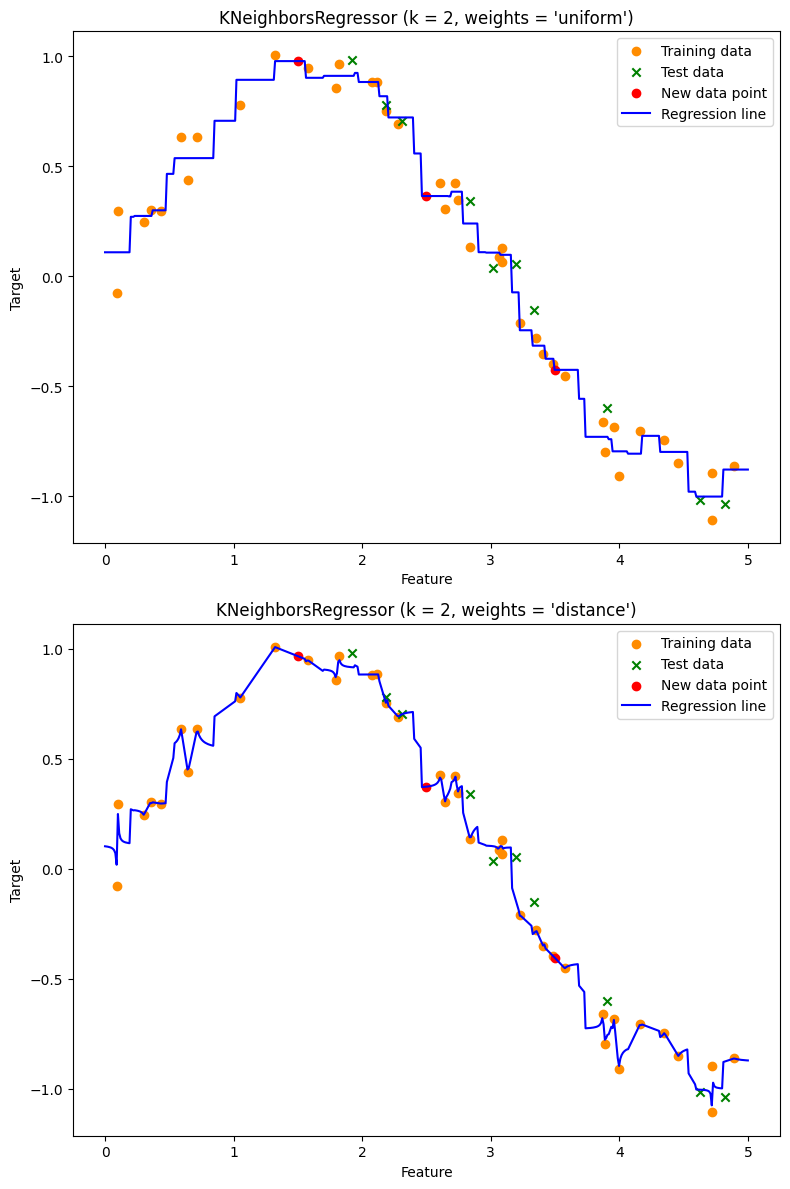

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Datos de ejemplo
np.random.seed(0)
X = np.sort(5 * np.random.rand(50, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, size=X.shape[0])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar modelos con ponderación "uniform"
n_neighbors = 2
knn_uniform = KNeighborsRegressor(n_neighbors=n_neighbors, weights='uniform')
knn_uniform.fit(X_train, y_train)

# Ajustar modelos con ponderación "distance"
knn_distance = KNeighborsRegressor(n_neighbors=n_neighbors, weights='distance')
knn_distance.fit(X_train, y_train)

# Agregar un nuevo dato manualmente
new_data_point = np.array([[2.5],[3.5],[1.5]])  # Ejemplo de nuevo dato

# Obtener predicciones para los nuevos datos
predicted_value_uniform = knn_uniform.predict(new_data_point)
predicted_value_distance = knn_distance.predict(new_data_point)

# Obtener las predicciones para los datos de entrenamiento y prueba
y_train_pred_uniform = knn_uniform.predict(X_train)
y_test_pred_uniform = knn_uniform.predict(X_test)

y_train_pred_distance = knn_distance.predict(X_train)
y_test_pred_distance = knn_distance.predict(X_test)

# Calcular las líneas de regresión
x_values = np.linspace(0, 5, 500).reshape(-1, 1)
y_values_uniform = knn_uniform.predict(x_values)
y_values_distance = knn_distance.predict(x_values)

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 12))

# Graficar con ponderación "uniform"
plt.subplot(2, 1, 1)
plt.scatter(X_train, y_train, color="darkorange", label="Training data")
plt.scatter(X_test, y_test, color="green", label="Test data", marker='x')
plt.scatter(new_data_point, predicted_value_uniform, color="red", label="New data point")
plt.plot(x_values, y_values_uniform, color='blue', label='Regression line')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("KNeighborsRegressor (k = %i, weights = 'uniform')" % n_neighbors)
plt.legend()

# Graficar con ponderación "distance"
plt.subplot(2, 1, 2)
plt.scatter(X_train, y_train, color="darkorange", label="Training data")
plt.scatter(X_test, y_test, color="green", label="Test data", marker='x')
plt.scatter(new_data_point, predicted_value_distance, color="red", label="New data point")
plt.plot(x_values, y_values_distance, color='blue', label='Regression line')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("KNeighborsRegressor (k = %i, weights = 'distance')" % n_neighbors)
plt.legend()

plt.tight_layout()
plt.show()